In [3]:
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
import datetime
import warnings
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline


In [41]:
df = pd.read_csv('./marketing.csv')
df.head()

,ID,BirthYear,Education,Marital_Status,Income,NKids,EnrollDate,Recency,Complain,AmtFruits,AmtMeats,AmtFish,AmtSweets,AmtGold,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumDiscPurchases,AccCampaign,Response
0,1,1985,Graduation,Married,70951.0,0,4/5/2013,66,0,10,554,254,87,54,3,4,9,1,None,No
1,2,1961,Graduation,Single,57091.0,0,15/6/2014,0,0,5,64,7,0,37,7,3,7,1,Second,Yes
2,3,1975,Master,Single,46098.0,2,18/8/2012,86,0,0,27,0,0,36,3,2,2,4,None,No
3,4,1947,PhD,Widow,25358.0,1,22/7/2013,57,0,0,5,0,0,8,1,0,3,2,None,No
4,5,1971,PhD,Married,60491.0,1,6/9/2013,81,0,47,237,12,19,76,6,11,7,4,None,No


In [42]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2230 entries, 0 to 2229
Data columns (total 20 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2230 non-null   int64  
 1   BirthYear            2230 non-null   int64  
 2   Education            2230 non-null   object 
 3   Marital_Status       2230 non-null   object 
 4   Income               2206 non-null   float64
 5   NKids                2230 non-null   int64  
 6   EnrollDate           2230 non-null   object 
 7   Recency              2230 non-null   int64  
 8   Complain             2230 non-null   int64  
 9   AmtFruits            2230 non-null   int64  
 10  AmtMeats             2230 non-null   int64  
 11  AmtFish              2230 non-null   int64  
 12  AmtSweets            2230 non-null   int64  
 13  AmtGold              2230 non-null   int64  
 14  NumWebPurchases      2230 non-null   int64  
 15  NumCatalogPurchases  2230 non-null   i

<AxesSubplot:xlabel='Response', ylabel='count'>

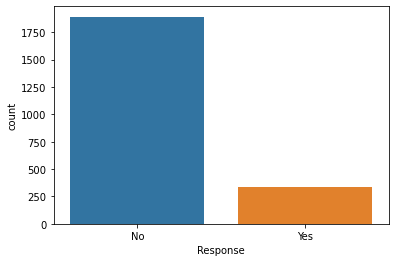

In [43]:
sns.countplot(df.Response)

In [44]:
df.BirthYear = pd.to_datetime(df['BirthYear'], format='%Y') 
year_now = datetime.datetime.now().year
df['Age'] = df['BirthYear'].apply(lambda x: year_now - x.year) 

df.drop('BirthYear', axis=1, inplace=True) 


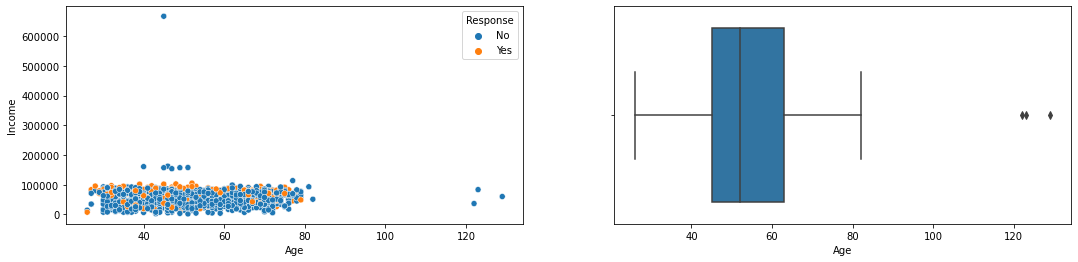

In [45]:
fig, ax = plt.subplots(1, 2, figsize=(18, 4))
sns.scatterplot(x='Age', y='Income', data=df, hue='Response', ax=ax[0])
sns.boxplot(x='Age', data=df, ax=ax[1])
plt.show()


In [46]:
df['spending'] =  df.AmtMeat + df.AmtFruits 
# df.drop(['AmtFish','AmtFruits','AmtMeats','AmtSweets','AmtGold'], axis=1, inplace=True)


AttributeError: 'DataFrame' object has no attribute 'AmtMeat'

ValueError: Could not interpret value `spending` for parameter `y`

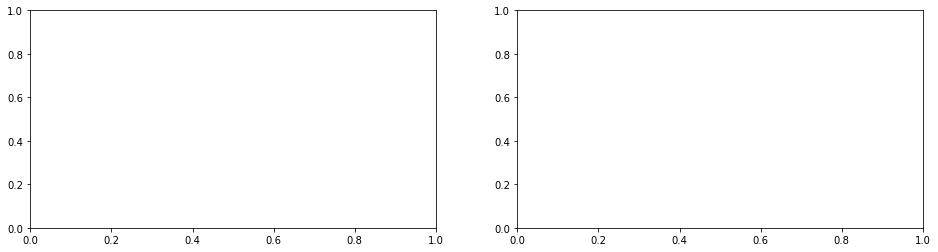

In [29]:
fig, ax = plt.subplots(1,2,figsize=(16,4))
sns.scatterplot(x='Income',y='spending',data=df,hue='Response',ax=ax[0])
sns.hitplot(df.spending,ax=ax[1]) 
plt.show()